# 15.7 Case Study: Unsupervised Machine Learning, Part 2—k-Means Clustering
### Iris Dataset
![Self Check Exercises check mark image](files/art/check.png)
## 15.7 Self Check
**1. _(Fill-In)_** Each cluster of samples is grouped around a `________`—the cluster’s center point. 

**Answer:** centroid.

**2. _(True/False)_** The k-means clustering algorithm studies the dataset then automatically determines the appropriate number of clusters. 

**Answer:** False. The algorithm organizes samples into the number of clusters you specify in advance.

## 15.7.1 Loading the Iris Dataset
**We added `%matplotlib inline` to enable Matplotlib in this notebook.**

In [1]:
%matplotlib inline
from sklearn.datasets import load_iris

In [2]:
iris = load_iris()

In [3]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

### Checking the Numbers of Samples, Features and Targets

In [4]:
iris.data.shape

(150, 4)

In [5]:
iris.target.shape

(150,)

In [6]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [7]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

## 15.7.2 Exploring the Iris Dataset: Descriptive Statistics with Pandas

In [8]:
import pandas as pd

In [11]:
pd.set_option('display.max_columns', 5)

In [12]:
pd.set_option('display.width', None)

In [13]:
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)

In [14]:
iris_df['species'] = [iris.target_names[i] for i in iris.target]

In [15]:
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [18]:
pd.set_option('display.precision', 2)

In [19]:
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.00,150.00,150.00,150.00
mean,5.84,3.06,3.76,1.20
std,0.83,0.44,1.77,0.76
min,4.30,2.00,1.00,0.10
25%,5.10,2.80,1.60,0.30
50%,5.80,3.00,4.35,1.30
75%,6.40,3.30,5.10,1.80
max,7.90,4.40,6.90,2.50


In [20]:
iris_df['species'].describe()

count        150
unique         3
top       setosa
freq          50
Name: species, dtype: object

## 15.7.3 Visualizing the Dataset with a Seaborn `pairplot` 

In [21]:
import seaborn as sns

In [22]:
sns.set(font_scale=1.1)

In [23]:
sns.set_style('whitegrid')

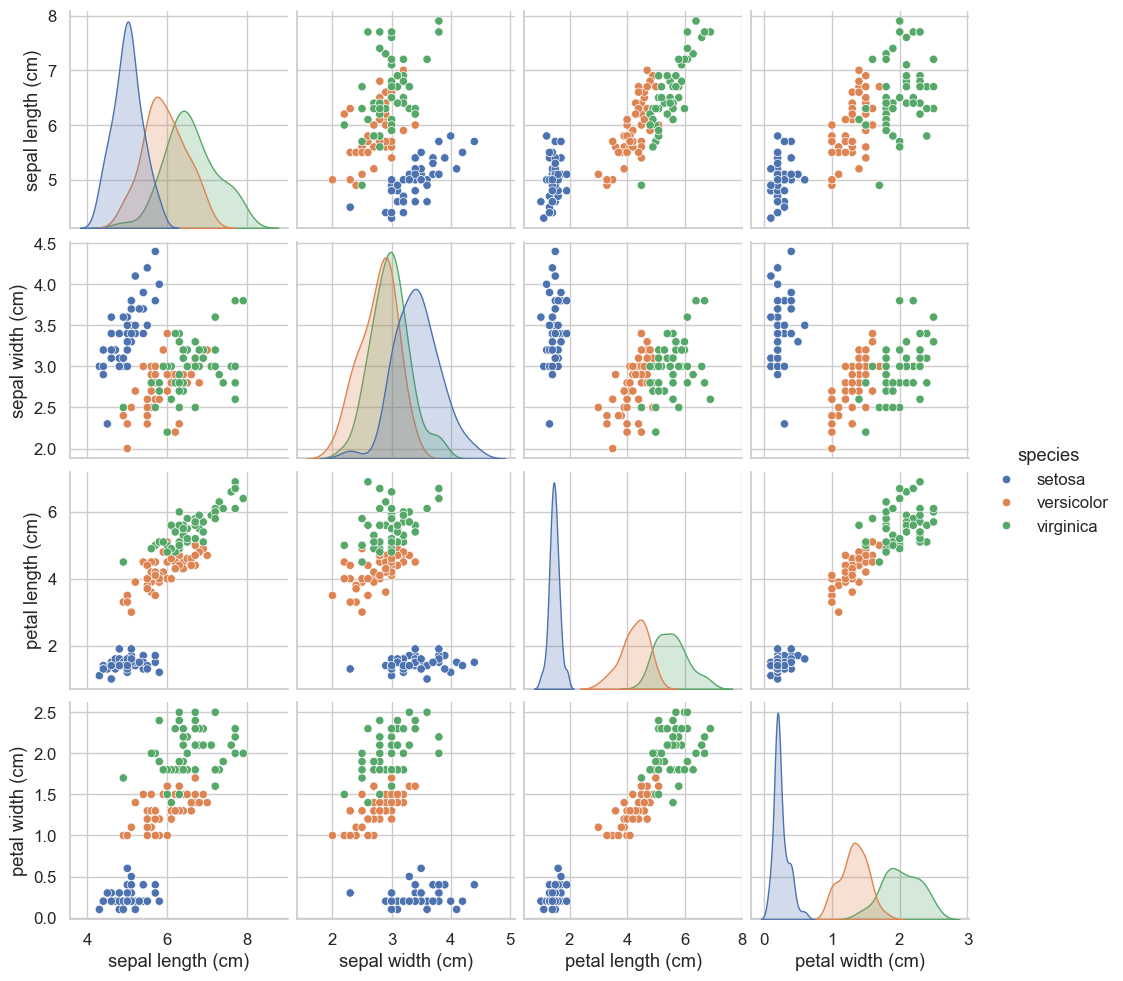

In [24]:
grid = sns.pairplot(data=iris_df, vars=iris_df.columns[0:4],
     hue='species')

### Displaying the pairplot in One Color

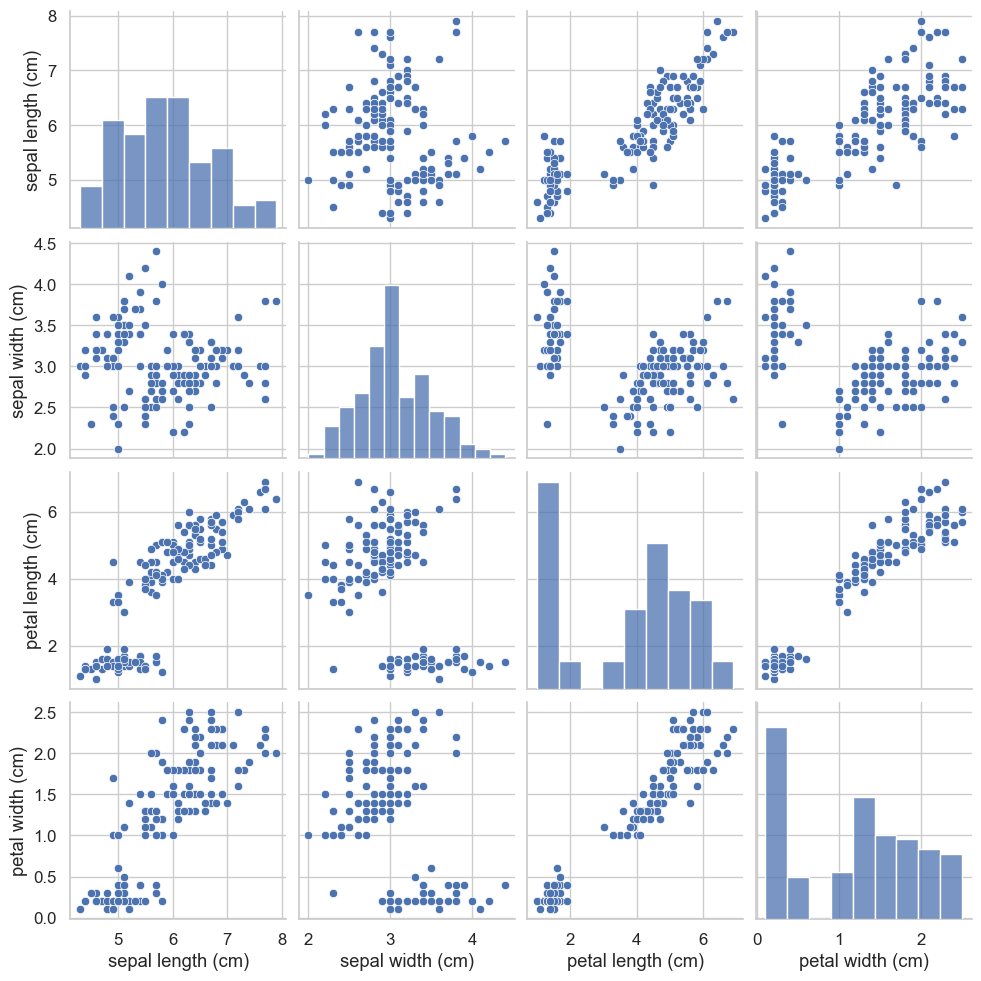

In [25]:
grid = sns.pairplot(data=iris_df, vars=iris_df.columns[0:4])

![Self Check Exercises check mark image](files/art/check.png)
## 15.7.3 Self Check
**1. _(Fill-In)_** Seaborn’s `________` function creates a grid of scatter plots showing features against one another.

**Answer:** `pairplot`.

**2. _(True/False)_** A plot of a feature’s distribution shows the feature’s range of values (left-to-right) and the number of samples with those values (top-to-bottom). 

**Answer:** True.

## 15.7.4 Using a `KMeans` Estimator
### Creating the Estimator

In [26]:
from sklearn.cluster import KMeans

In [27]:
kmeans = KMeans(n_clusters=3, random_state=11)

### Fitting the Model

In [28]:
kmeans.fit(iris.data)

,n_clusters,3
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,11
,copy_x,True
,algorithm,'lloyd'


### Comparing the Computer Cluster Labels to the Iris Dataset’s Target Values

In [29]:
print(kmeans.labels_[0:50])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [30]:
print(kmeans.labels_[50:100])

[2 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [31]:
print(kmeans.labels_[100:150])

[2 1 2 2 2 2 1 2 2 2 2 2 2 1 1 2 2 2 2 1 2 1 2 1 2 2 1 1 2 2 2 2 2 1 2 2 2
 2 1 2 2 2 1 2 2 2 1 2 2 1]


![Self Check Exercises check mark image](files/art/check.png)
## 15.7.4 Self Check
**1. _(IPython Session)_** Try k-means clustering on the Iris dataset with two clusters, then display the first 50 and the last 100 elements of the estimator’s `labels_` array.

**Answer:** 

In [32]:
kmeans2 = KMeans(n_clusters=2, random_state=11)

In [33]:
kmeans2.fit(iris.data)

,n_clusters,2
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,11
,copy_x,True
,algorithm,'lloyd'


In [34]:
print(kmeans2.labels_[0:50])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [35]:
print(kmeans2.labels_[50:150])

[1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


## 15.7.5 Dimensionality Reduction with Principal Component Analysis
### Creating the PCA Object

In [36]:
from sklearn.decomposition import PCA

In [37]:
pca = PCA(n_components=2, random_state=11)

### Transforming the Iris Dataset’s Features into Two Dimensions

In [38]:
pca.fit(iris.data)

,n_components,2
,copy,True
,whiten,False
,svd_solver,'auto'
,tol,0.0
,iterated_power,'auto'
,n_oversamples,10
,power_iteration_normalizer,'auto'
,random_state,11


In [39]:
iris_pca = pca.transform(iris.data)

In [40]:
iris_pca.shape

(150, 2)

### Visualizing the Reduced Data

In [41]:
iris_pca_df = pd.DataFrame(iris_pca, 
                            columns=['Component1', 'Component2'])

In [42]:
iris_pca_df['species'] = iris_df.species

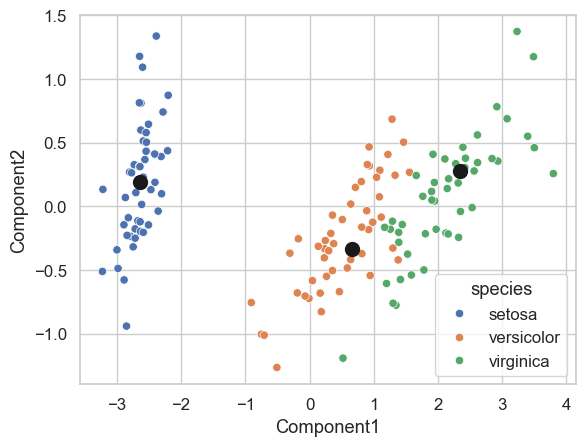

In [43]:
axes = sns.scatterplot(data=iris_pca_df, x='Component1', 
     y='Component2', hue='species', legend='brief') 

iris_centers = pca.transform(kmeans.cluster_centers_)

import matplotlib.pyplot as plt

dots = plt.scatter(iris_centers[:,0], iris_centers[:,1], 
                    s=100, c='k')

In [44]:
# This placeholder cell was added because we had to combine 
# the sections snippets 39-42 for the visualization to work in Jupyter
# and we wanted the subsequent snippet numbers to match the book

In [45]:
# placeholder cell 

In [46]:
# placeholder cell 

![Self Check Exercises check mark image](files/art/check.png)
## 15.7.6 Self Check
**1. _(True/False)_** Each centroid in a `KMeans` object’s `cluster_centers_` array has the same number of features as the original dataset.

**Answer:** True.

**2. _(Discussion)_** What is the purpose of the following statement?
```python
iris_centers = pca.transform(kmeans.cluster_centers_)
```

**Answer:** This statement reduces the centroids to the number of dimensions specified when the pca object was created. In the Iris case study, we were able to plot the reduced centroids in two dimensions at the centers of their corresponding clusters.

## 15.7.6 Choosing the Best Clustering Estimator

In [47]:
from sklearn.cluster import DBSCAN, MeanShift,\
     SpectralClustering, AgglomerativeClustering

In [48]:
estimators = {
    'KMeans': kmeans,
    'DBSCAN': DBSCAN(),
    'MeanShift': MeanShift(),
    'SpectralClustering': SpectralClustering(n_clusters=3),
    'AgglomerativeClustering': 
        AgglomerativeClustering(n_clusters=3)
}

In [49]:
import numpy as np

In [50]:
for name, estimator in estimators.items():
     estimator.fit(iris.data)
     print(f'\n{name}:')
     for i in range(0, 101, 50):
         labels, counts = np.unique(
             estimator.labels_[i:i+50], return_counts=True)
         print(f'{i}-{i+50}:')
         for label, count in zip(labels, counts):
             print(f'   label={label}, count={count}')
             


KMeans:
0-50:
   label=0, count=50
50-100:
   label=1, count=47
   label=2, count=3
100-150:
   label=1, count=14
   label=2, count=36

DBSCAN:
0-50:
   label=-1, count=1
   label=0, count=49
50-100:
   label=-1, count=6
   label=1, count=44
100-150:
   label=-1, count=10
   label=1, count=40

MeanShift:
0-50:
   label=1, count=50
50-100:
   label=0, count=49
   label=1, count=1
100-150:
   label=0, count=50

SpectralClustering:
0-50:
   label=0, count=50
50-100:
   label=2, count=50
100-150:
   label=1, count=35
   label=2, count=15

AgglomerativeClustering:
0-50:
   label=1, count=50
50-100:
   label=0, count=49
   label=2, count=1
100-150:
   label=0, count=15
   label=2, count=35


In [51]:
##########################################################################
# (C) Copyright 2019 by Deitel & Associates, Inc. and                    #
# Pearson Education, Inc. All Rights Reserved.                           #
#                                                                        #
# DISCLAIMER: The authors and publisher of this book have used their     #
# best efforts in preparing the book. These efforts include the          #
# development, research, and testing of the theories and programs        #
# to determine their effectiveness. The authors and publisher make       #
# no warranty of any kind, expressed or implied, with regard to these    #
# programs or to the documentation contained in these books. The authors #
# and publisher shall not be liable in any event for incidental or       #
# consequential damages in connection with, or arising out of, the       #
# furnishing, performance, or use of these programs.                     #
##########################################################################
